<a href="https://colab.research.google.com/github/Sumedhkhangan/MINI_PROJECT_1/blob/main/AirQualityModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIR QUALITY MODEL**


In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
df = pd.read_csv("/content/city_day.csv")

In [3]:
df


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
#We drop the Xylene, NO, NOx, NH3 , Benzene ,Toulene columns as  they have too many NULL values
#We extract out the year and month data
def preprocessing(df):
    # Convert 'Date' to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract year and month
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

    # Drop rows with missing AQI values
    df.dropna(subset=['AQI'], inplace=True)

    # List of columns to drop
    columns_to_drop = ['Xylene', 'NO', 'NOx', 'NH3', 'Benzene', 'Toluene']

    # Drop specified columns
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Handle remaining missing values
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

    return df

In [7]:
cleaned_df = preprocessing(df)
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        24850 non-null  object        
 1   Date        24850 non-null  datetime64[ns]
 2   PM2.5       24850 non-null  float64       
 3   PM10        24850 non-null  float64       
 4   NO2         24850 non-null  float64       
 5   CO          24850 non-null  float64       
 6   SO2         24850 non-null  float64       
 7   O3          24850 non-null  float64       
 8   AQI         24850 non-null  float64       
 9   AQI_Bucket  24850 non-null  object        
 10  Year        24850 non-null  int32         
 11  Month       24850 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(2), object(2)
memory usage: 2.3+ MB
None


In [8]:
cleaned_df

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket,Year,Month
28,Ahmedabad,2015-01-29,83.13,96.18,28.71,6.93,49.52,59.76,209.0,Poor,2015,1
29,Ahmedabad,2015-01-30,79.84,96.18,28.68,13.85,48.49,97.07,328.0,Very Poor,2015,1
30,Ahmedabad,2015-01-31,94.52,96.18,32.66,24.39,67.39,111.33,514.0,Severe,2015,1
31,Ahmedabad,2015-02-01,135.99,96.18,42.08,43.48,75.23,102.70,782.0,Severe,2015,2
32,Ahmedabad,2015-02-02,178.33,96.18,35.31,54.56,55.04,107.38,914.0,Severe,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,25.06,0.47,8.55,23.30,41.0,Good,2020,6
29527,Visakhapatnam,2020-06-28,24.38,74.09,26.06,0.52,12.72,30.14,70.0,Satisfactory,2020,6
29528,Visakhapatnam,2020-06-29,22.91,65.73,29.53,0.48,8.42,30.96,68.0,Satisfactory,2020,6
29529,Visakhapatnam,2020-06-30,16.64,49.97,29.26,0.52,9.84,28.30,54.0,Satisfactory,2020,6


In [9]:
def plot_correlation_heatmap(df, figsize=(22, 18), font_scale=1.2):
    # Set the style and font scale for better readability
    sns.set(style="white")
    sns.set(font_scale=font_scale)

    # Calculate the correlation matrix
    df_corr = df.select_dtypes(include=np.number).corr()

    # Drop 'Year' and 'Month' from both axes if they exist
    columns_to_drop = ['Year', 'Month']
    df_corr = df_corr.drop(columns=columns_to_drop, errors='ignore')
    df_corr = df_corr.drop(index=columns_to_drop, errors='ignore')

    # Create the figure and axes
    plt.figure(figsize=figsize)


    # Create the heatmap
    ax = sns.heatmap(
        df_corr,

        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True, fmt='.2f',
        cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
        linewidths=0.5,
        annot_kws={"size": 10}
    )

    # Rotate x-axis labels and adjust their position
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Set title and adjust layout
    plt.title("Correlation Heatmap of Air Quality Features", fontsize=28, pad=20)

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

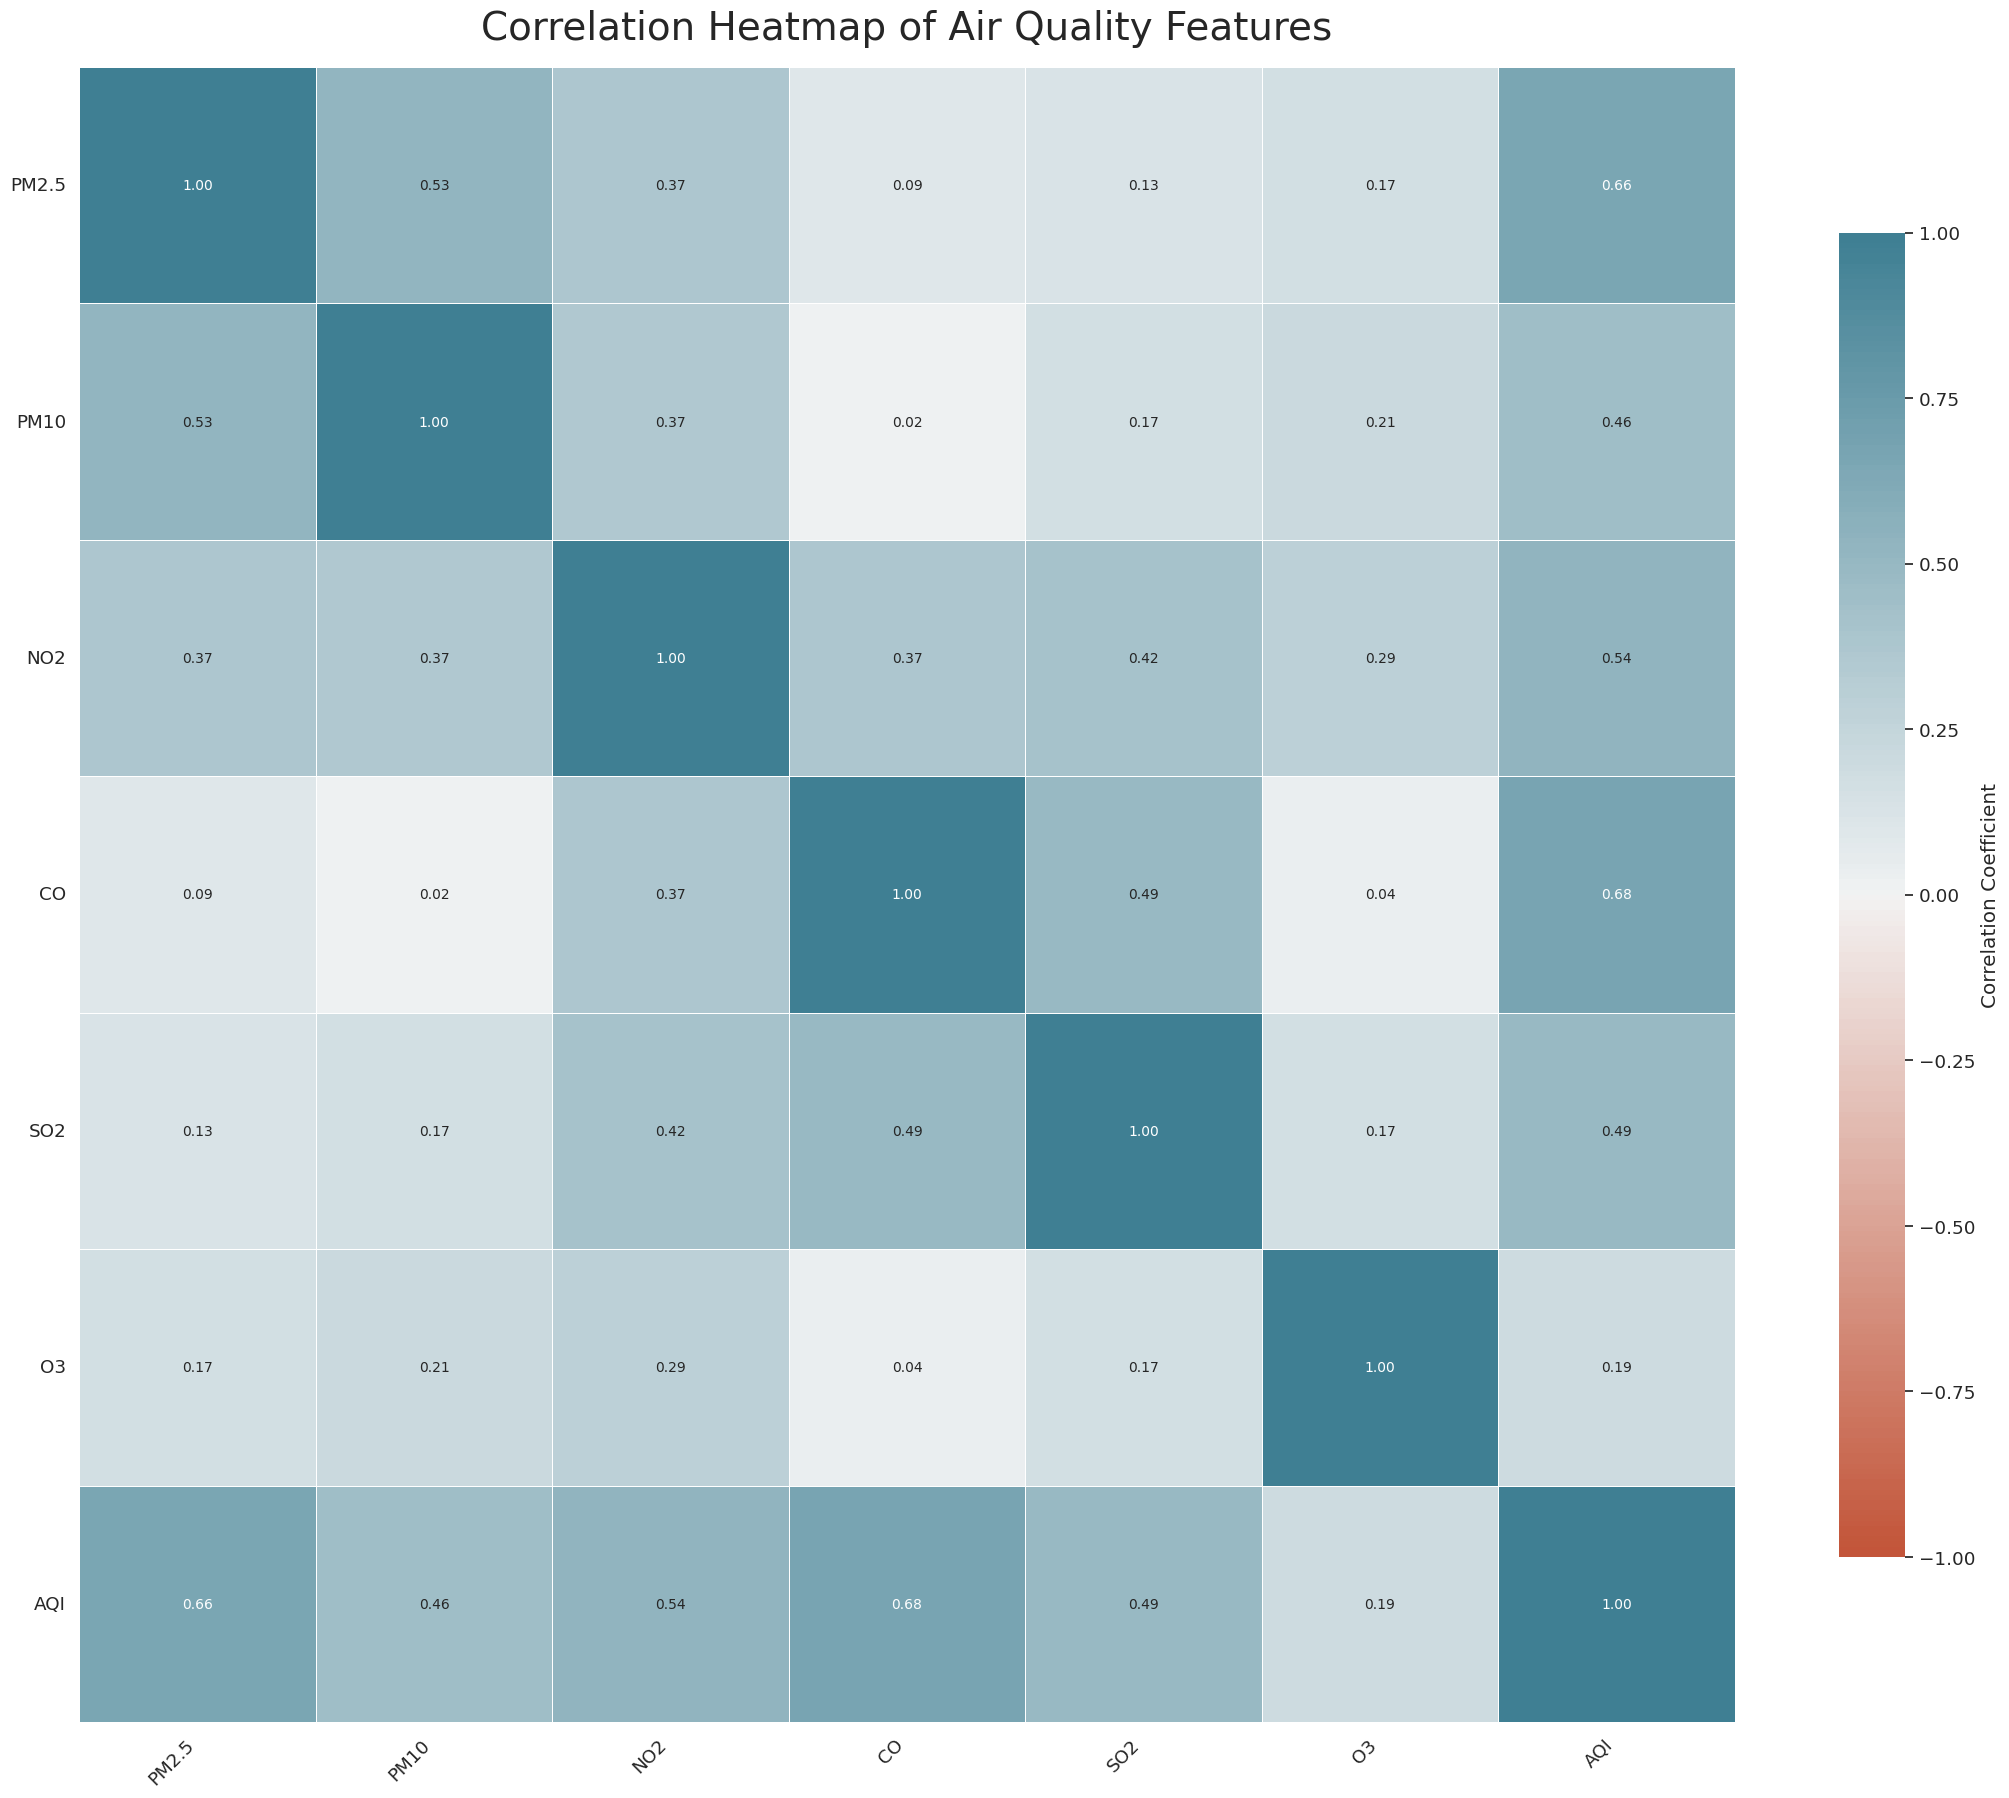

In [10]:
plot_correlation_heatmap(cleaned_df)

In [14]:
#List of cities for which we have the data
cities = cleaned_df['City'].unique()
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [15]:
#Extracting out the data for Jaiur, delhi and guwahati
bengaluru = cleaned_df[df['City'] == 'Bengaluru']
delhi = cleaned_df[df['City'] == 'Delhi']
mumbai = cleaned_df[df['City'] == 'Mumbai']

In [16]:
bengaluru

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket,Year,Month
4373,Bengaluru,2015-03-21,48.59,96.18,27.00,3.89,1.94,52.96,91.0,Satisfactory,2015,3
4374,Bengaluru,2015-03-22,47.38,96.18,22.39,11.29,2.05,71.85,120.0,Moderate,2015,3
4375,Bengaluru,2015-03-23,65.65,96.18,26.35,9.95,6.30,72.84,154.0,Moderate,2015,3
4376,Bengaluru,2015-03-24,60.47,96.18,29.87,1.46,6.07,64.12,119.0,Moderate,2015,3
4377,Bengaluru,2015-03-25,62.56,96.18,23.57,10.05,4.98,82.34,232.0,Poor,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6298,Bengaluru,2020-06-27,16.60,29.48,13.68,0.67,7.29,15.69,51.0,Satisfactory,2020,6
6299,Bengaluru,2020-06-28,20.44,26.34,10.33,0.66,6.60,17.59,61.0,Satisfactory,2020,6
6300,Bengaluru,2020-06-29,28.68,29.27,12.12,0.56,6.33,16.99,65.0,Satisfactory,2020,6
6301,Bengaluru,2020-06-30,14.47,24.26,12.69,0.56,6.45,16.08,63.0,Satisfactory,2020,6
